Go to directory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR
change disp_unit = radian due to rewrapping
reading height data from file: INPUTS/geometryRadar.h5 ...
change disp_unit = radian due to rewrapping
reading height data from file: INPUTS/geometryRadar.h5 ...
save to SierraNegraAlosAT133_vel.png


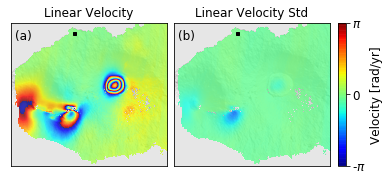

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar.simulation.plot import *
from pysar import view

work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

print_msg=False
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[6, 3])
for dset, ax, title, num in zip(['velocity', 'velocityStd'],
                                axs,
                                ['Linear Velocity', 'Linear Velocity Std'],
                                ['(a)', '(b)']):
    cmd  = 'view.py velocity.h5 {} --wrap -m maskTempCoh.h5 '.format(dset)
    cmd += '-d INPUTS/geometryRadar.h5 --dem-nocontour '
    cmd += '--figsize 6 3 --notick --notitle --ref-size 3 --nocbar --fontsize 12 '
    d_v, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
    ax, inps, im, cbar = view.plot_slice(ax, d_v, atr, inps, print_msg=print_msg)
    ax.set_title(title, fontsize=font_size)
    ax.annotate(num, xy=(0.03, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)
inps.cbar_label = 'Velocity [rad/yr]'
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad="5%")
cax.axis('off')

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad="5%")
inps, cbar = pp.plot_colorbar(inps, im, cax)
fig.subplots_adjust(wspace=-0.05)

out_file = '{}_vel.png'.format(proj_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to '+out_file)
plt.show()

In [25]:
axs[1].get_position()

Bbox([[0.5314851485148515, 0.125], [0.93, 0.88]])